# Reminders

- **Fri**: Module 6 (One Task Per Function): Tutorial Resubmission
- No tutorial resubmission for Module 7
- No tutorial for Module 8
- Starting **this** week: Tutorial sessions (Thu) will be open office hours, for project help
- Lecture time next Tue/Thu also open office hours

- Do the course evaluations!

See your Canvas calendar (https://canvas.ubc.ca/calendar) for details.

---

# Project Tips

* Focus on one thing at a time. It's easy to get overwhelmed with the helpers (or helpers of helpers/helpers of helpers of helpers) so just focus on finishing one function at a time.
* Determine what values you need for your graph
  * Line graphs: one list of x-coordinates and one list of y-coordinates
  * Scatterplots: one list of x-coordinates and one list of y-coordinates (more on this later today if we have time)
    * See the scatterplot example in the module 8 day 1 folder 
  * Bar graphs: one list of x-coordinates (or a list of labels -- more on this later today) and a list indicating how tall each bar will be
  * Pie charts: one list of values indicating the value of each pie slice
* **Reuse your functions when possible**. For example, we don't need to write four different filter functions to find CrimeData of a particular type. We can write **one** function and **call** it multiple times.
* Adapt the Module 8 Worked Examples!

## For those of you creating a bar graph/pie chart, please see the explanation slides on Canvas. It covers lots of common questions about the Worked Examples.
---

# Final Exam

**December 17, 2023 at 3:30PM in [SRC A/B/C](https://maps.ubc.ca/?code=SRC)**


When studying...

* Do the practice questions! **Don’t just read the solution**. It is super easy to fool yourself into thinking you will know how to do it or that you will remember to write down all the recipe steps.
* If you feel stuck on a question, try to identify how/why you are stuck. Go through the recipe step by step and ask yourself if you know how to complete a particular step. If you don't, that's a great place to start asking questions!
  * E.g., How do I know that the signature must be &lt;this&gt;? Why can't it be &lt;that&gt;? Why is one design better than the other?
  * E.g., Why did we write &lt;this test&gt;? What was the point of including it?
  * E.g., How should I implement the function body? I know what the template is but I'm stuck on trying to change the template into what I need.
 
---

# Mapping Crime Count in Vancouver

Let's just have some plotting fun!

This is loosely an HtDAP design, but we've skipped the planning stages to keep it short! We're also working from the Module 7 VPD location project for fun :)

So, edit and refactor this into something to map crime! (We've already updated the data definitions and `read` function, but not `main` or `analyze`!)

In [4]:
from cs103 import *
from typing import NamedTuple, List
from enum import Enum
import csv
import matplotlib.pyplot as pyplot

##################
# Data Definitions

# We generally use a threshold of about 15 to 17 values as the upper
# limit for Enum values. If you have more values than that, feel free
# to represent the data in another way (e.g., using simple atomic data
# types). In this case, we only have 4 crime types (or 11 if we 
# consider the full dataset so we can comfortablely use an enum).

# You could have also abbreviated these names to something much shorter
# (but you would still need to clearly state what each enum value maps
# to in the dataset).

CrimeType = Enum('CrimeType', ["BNE_COMMERCIAL", "BNE_RESIDENTIAL", 
                               "THEFT_OF_BICYCLE", "THEFT_OF_VEHICLE"])
# interp. This is the type of crime, oe of break-and-enter of a commercial building
# (BNE_COMMERCIAL), break-and-enter of a residential (or other) building
# (BNE_RESIDENTIAL), theft of a vehicle (THEFT_OF_VEHICLE), or
# theft of a bicycle (THEFT_OF_BICYCLE)

# examples are redundant for enumerations

@typecheck
def fn_for_crime_type(ct: CrimeType) -> ...:
    # template from enumeration (4 fields)
    if ct == CrimeType.BNE_COMMERCIAL:
        return ...
    elif ct == CrimeType.BNE_RESIDENTIAL:
        return ...
    elif ct == CrimeType.THEFT_OF_BICYCLE:
        return ...
    elif ct == CrimeType.THEFT_OF_VEHICLE:
        return ...
    

CrimeData = NamedTuple('CrimeData', [('type', CrimeType),
                                    ('hour', int)]) # in range [0, 23]
# interp. the data about a single crime in Vancouver with the type of crime
# and the hour in which the VPD reported it
# (Caution: hours of 0 are sometimes intentionally inaccurate reports or placeholders)

CD1 = CrimeData(CrimeType.BNE_RESIDENTIAL, 11)
CD2 = CrimeData(CrimeType.THEFT_OF_BICYCLE, 23)

@typecheck
def fn_for_crime_data(cd: CrimeData) -> ...:
    # template based on compound (2 fields) and reference rule
    return ...(fn_type_crime_type(cd.type),
               cd.hour)


# List[CrimeData]
# interp. a list of crime data

LOCD0 = []
LOCD1 = [CD1, CD2]

@typecheck
def fn_for_locd(locd: List[CrimeData]) -> ...:
    # template based on arbitrary-sized data and reference rule
    # description of the accumulator
    acc = ...   # type: ...

    for cd in locd:
        acc = ...(fn_for_crime_data(cd), acc)

    return ...(acc)

In [5]:
# Here are some definitions we'll need later on that aren't particularly interesting to work on in class!

# List[str]
# interp. a list of strings
LOS0 = []
LOS1 = ['hello', 'world']

# template based on arbitrary-sized data
@typecheck
def fn_for_los(los: List[str]) -> ...:
    # description of accumulator
    acc = ... # type: ...
    
    for s in los:
        acc = ...(s, acc)
        
    return ...(acc)


# List[int]
# interp. a list of integers
LOI0 = []
LOI1 = [1, -12]

# template based on arbitrary-sized data
@typecheck
def fn_for_loi(loi: List[int]) -> ...:
    # description of accumulator
    acc = ... # type: ...
    
    for i in loi:
        acc = ...(i, acc)
        
    return ...(acc)

In [6]:
@typecheck
def parse_crime_type(s:str) -> CrimeType:
    """
    Returns the string s as a CrimeType.
    
    Assumes s is one of the following:
        "Break and Enter Commercial"
        "Break and Enter Residential/Other"
        "Theft of Bicycle"
        "Theft of Vehicle"
    """
    # return CrimeType.BEC # stub
    # template from atomic non-distinct
    # return ...(s)
    if s == "Break and Enter Commercial":
        return CrimeType.BNE_COMMERCIAL
    elif s == "Break and Enter Residential/Other":
        return CrimeType.BNE_RESIDENTIAL
    elif s == "Theft of Bicycle":
        return CrimeType.THEFT_OF_BICYCLE
    elif s == "Theft of Vehicle":
        return CrimeType.THEFT_OF_VEHICLE
    
    
start_testing()

expect(parse_crime_type("Break and Enter Commercial"), CrimeType.BNE_COMMERCIAL)
expect(parse_crime_type("Break and Enter Residential/Other"), CrimeType.BNE_RESIDENTIAL)
expect(parse_crime_type("Theft of Bicycle"), CrimeType.THEFT_OF_BICYCLE)
expect(parse_crime_type("Theft of Vehicle"), CrimeType.THEFT_OF_VEHICLE)

summary()

@typecheck
def is_reliable(row: List[str]) -> bool:
    """
    Returns True if the hour of the crime (row[4]) is non-zero.
    
    ASSUMES: row is a full row of values from a crime data information file.
    Specifically, row[4] must exist, be the hours, and be a string representation of an int.
    
    Hours of 0 are not reliable since they may simply indicate missing data.
    """
#     return True # stub
    # template treats row as atomic and uses indexing instead
    # return ...(row) # template
    return row[4] != "0"


########################
# Tests for is_reliable
########################
start_testing()

expect(is_reliable(["Break and Enter Commercial","2018","3","2","6","17",
                    "10XX ALBERNI ST","West End","491058.8169","5459123.086"]), True)
expect(is_reliable(["Break and Enter Commercial","2018","3","2","0","17",
                    "10XX ALBERNI ST","West End","491058.8169","5459123.086"]), False)

summary()


@typecheck
def read(filename: str) -> List[CrimeData]:
    """    
    reads information from the specified file and returns a list of crime data
    """
    #return []  #stub
    # Template from HtDAP
    # locd contains the result so far
    locd = [] # type: List[CrimeData]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        next(reader) # skip header line

        for row in reader:
            # you may not need to store all the rows, and you may need
            # to convert some of the strings to other types
            
            # row[0] -> Type of crime (str)
            # row[4] -> Hour (str)
            if is_reliable(row):
                cd = CrimeData(parse_crime_type(row[0]), parse_int(row[4]))
                locd.append(cd)
    
    return locd
    
######################
# Tests for read
######################
start_testing()

# Examples and tests for read
expect(read("test_empty.csv"), [])
expect(read("test_small1.csv"), [CrimeData(CrimeType.BNE_COMMERCIAL, 6)])
expect(read("test_small2.csv"), [CrimeData(CrimeType.BNE_COMMERCIAL, 6),
                                CrimeData(CrimeType.BNE_RESIDENTIAL, 9),
                                CrimeData(CrimeType.THEFT_OF_BICYCLE, 11),
                                CrimeData(CrimeType.THEFT_OF_VEHICLE, 15),
                                CrimeData(CrimeType.THEFT_OF_VEHICLE, 15),
                                CrimeData(CrimeType.THEFT_OF_VEHICLE, 16),
                                CrimeData(CrimeType.THEFT_OF_VEHICLE, 16),
                                CrimeData(CrimeType.BNE_RESIDENTIAL, 9),
                                CrimeData(CrimeType.BNE_RESIDENTIAL, 20)])

summary()

4 of 4 tests passed
2 of 2 tests passed
3 of 3 tests passed


## Bar Chart Demo

Our "template" in the viz module is just to copy-and-paste from a sample of the kind of plot we want. That's not so unrealistic as a starting point as long as we understand what we're using!

This bar chart demo is **slightly** different from what is shown in the Worked Example. The demo below is as bare-bones as you can get but if you want to customize your visualization some more (e.g., adjust bar width, colour etc.), then you can play with optional keywords in <code>plt.bar</code>. Use <code>help(plt.bar)</code> to see what kind of optional keywords are available for you to use.

See the bar chart slides on Canvas for a longer explanation on the Bar Chart Worked Example.

```python
@typecheck
def display_bar_chart(labels: List[str], means: List[int]) -> None:
    """
    display a bar chart showing the mean scores for the test by age group
    
    the age groups are assumed to start at 0 and span 10 years (e.g. 0-9, 10-19, etc.)
    """

    # If you had VERY specific locations for each bar (e.g., one bar is at x = 5, another is at x = 25, and a third is at x = 30),
    # you would call plt.bar differently. Specifically you would replace labels with [5, 25, 30] to indicate the locations of
    # the bars. You would, of course, then lose the bar labels and would have to add them in separately afterwards.
    # See the bar chart worked example for how you would add the labels to the bars in this case.
    rects1 = plt.bar(labels, means)

    # set the labels for the x-axis, y-axis, and plot title
    pyplot.xlabel('Age Group')
    pyplot.ylabel('Scores')
    pyplot.title('Scores by age')
    
    # set the range for the axes
    # [x-min, x-max, y-min, y-max]
    # pyplot.axis([0,79,0,100])

    # OPTIONAL: If the labels for the bar are too long, we can turn them 90 degrees
    # to make it easier to read
    # pyplot.xticks(rotation=90)
    
    # show the plot
    pyplot.show()
    
    # by default, Python returns None if it gets to the end of a function and there is no call to return
    # so we could have omitted the next line of code. It also returns None when there is a return 
    # statement that does not explicitly return a value (like we have here)
    return
```

In [7]:
# Here are some helper functions

@typecheck
def does_crime_type_match(ct1: CrimeType, ct2: CrimeType) -> bool:
    """
    Returns True if ct1 is the same as ct2; False otherwise.
    """
#     return True # stub
    # template based on CrimeType (twice)
    if ct1 == CrimeType.BNE_COMMERCIAL:
        return ct2 == CrimeType.BNE_COMMERCIAL
    elif ct1 == CrimeType.BNE_RESIDENTIAL:
        return ct2 == CrimeType.BNE_RESIDENTIAL
    elif ct1 == CrimeType.THEFT_OF_BICYCLE:
        return ct2 == CrimeType.THEFT_OF_BICYCLE
    elif ct1 == CrimeType.THEFT_OF_VEHICLE:
        return ct2 == CrimeType.THEFT_OF_VEHICLE

####################################
# Tests for does_crime_type_match
###################################
start_testing()

expect(does_crime_type_match(CrimeType.BNE_COMMERCIAL, CrimeType.BNE_COMMERCIAL), True)
expect(does_crime_type_match(CrimeType.BNE_COMMERCIAL, CrimeType.BNE_RESIDENTIAL), False)
expect(does_crime_type_match(CrimeType.BNE_COMMERCIAL, CrimeType.THEFT_OF_VEHICLE), False)
expect(does_crime_type_match(CrimeType.BNE_COMMERCIAL, CrimeType.THEFT_OF_BICYCLE), False)

expect(does_crime_type_match(CrimeType.BNE_RESIDENTIAL, CrimeType.BNE_COMMERCIAL), False)
expect(does_crime_type_match(CrimeType.BNE_RESIDENTIAL, CrimeType.BNE_RESIDENTIAL), True)
expect(does_crime_type_match(CrimeType.BNE_RESIDENTIAL, CrimeType.THEFT_OF_VEHICLE), False)
expect(does_crime_type_match(CrimeType.BNE_RESIDENTIAL, CrimeType.THEFT_OF_BICYCLE), False)

expect(does_crime_type_match(CrimeType.THEFT_OF_VEHICLE, CrimeType.BNE_COMMERCIAL), False)
expect(does_crime_type_match(CrimeType.THEFT_OF_VEHICLE, CrimeType.BNE_RESIDENTIAL), False)
expect(does_crime_type_match(CrimeType.THEFT_OF_VEHICLE, CrimeType.THEFT_OF_VEHICLE), True)
expect(does_crime_type_match(CrimeType.THEFT_OF_VEHICLE, CrimeType.THEFT_OF_BICYCLE), False)

expect(does_crime_type_match(CrimeType.THEFT_OF_BICYCLE, CrimeType.BNE_COMMERCIAL), False)
expect(does_crime_type_match(CrimeType.THEFT_OF_BICYCLE, CrimeType.BNE_RESIDENTIAL), False)
expect(does_crime_type_match(CrimeType.THEFT_OF_BICYCLE, CrimeType.THEFT_OF_VEHICLE), False)
expect(does_crime_type_match(CrimeType.THEFT_OF_BICYCLE, CrimeType.THEFT_OF_BICYCLE), True)

summary()


@typecheck
def filter_for_crime_type(locd: List[CrimeData], crime_type: CrimeType) -> List[CrimeData]:
    """
    Filters locd to only keep crimes with type crime_type
    """
#     return [] # stub
    # template based on List[CrimeData] with additional parameter crime_type
    # the crimes seen so far that are of crime_type
    acc = [] # type: List[CrimeData]
    
    for cd in locd:
        if does_crime_type_match(cd.type, crime_type):
            acc.append(cd)
        
    return acc

##################################
# Tests for filter_for_crime_type
###################################
start_testing()

# Case 1: Empty list
expect(filter_for_crime_type([], CrimeType.BNE_COMMERCIAL), [])

# Case 2: List doesn't have our crime type of interest
expect(filter_for_crime_type([CrimeData(CrimeType.THEFT_OF_BICYCLE, 5)], CrimeType.BNE_COMMERCIAL), [])
expect(filter_for_crime_type([CrimeData(CrimeType.THEFT_OF_BICYCLE, 5), 
                             CrimeData(CrimeType.THEFT_OF_VEHICLE, 15),
                             CrimeData(CrimeType.BNE_RESIDENTIAL, 20)], CrimeType.BNE_COMMERCIAL), [])

# Case 3: List has some items of interest but not all the items are of interest
expect(filter_for_crime_type([CrimeData(CrimeType.THEFT_OF_BICYCLE, 2),
                             CrimeData(CrimeType.BNE_RESIDENTIAL, 16),
                             CrimeData(CrimeType.THEFT_OF_VEHICLE, 16)], CrimeType.THEFT_OF_VEHICLE), [CrimeData(CrimeType.THEFT_OF_VEHICLE, 16)])

expect(filter_for_crime_type([CrimeData(CrimeType.THEFT_OF_BICYCLE, 2),
                             CrimeData(CrimeType.BNE_RESIDENTIAL, 16),
                             CrimeData(CrimeType.THEFT_OF_VEHICLE, 16),
                             CrimeData(CrimeType.THEFT_OF_VEHICLE, 18),
                             CrimeData(CrimeType.THEFT_OF_VEHICLE, 4)], CrimeType.THEFT_OF_VEHICLE), 
       [CrimeData(CrimeType.THEFT_OF_VEHICLE, 16),
        CrimeData(CrimeType.THEFT_OF_VEHICLE, 18),
        CrimeData(CrimeType.THEFT_OF_VEHICLE, 4)])

# Case 4: All items in list are of interest
expect(filter_for_crime_type([CrimeData(CrimeType.THEFT_OF_VEHICLE, 16),
                             CrimeData(CrimeType.THEFT_OF_VEHICLE, 18),
                             CrimeData(CrimeType.THEFT_OF_VEHICLE, 4)], CrimeType.THEFT_OF_VEHICLE), 
       [CrimeData(CrimeType.THEFT_OF_VEHICLE, 16),
        CrimeData(CrimeType.THEFT_OF_VEHICLE, 18),
        CrimeData(CrimeType.THEFT_OF_VEHICLE, 4)])

summary()

16 of 16 tests passed
6 of 6 tests passed


<div class="alert alert-success">
    
**Draw a bar chart showing the frequency of each type of crime**

</div>

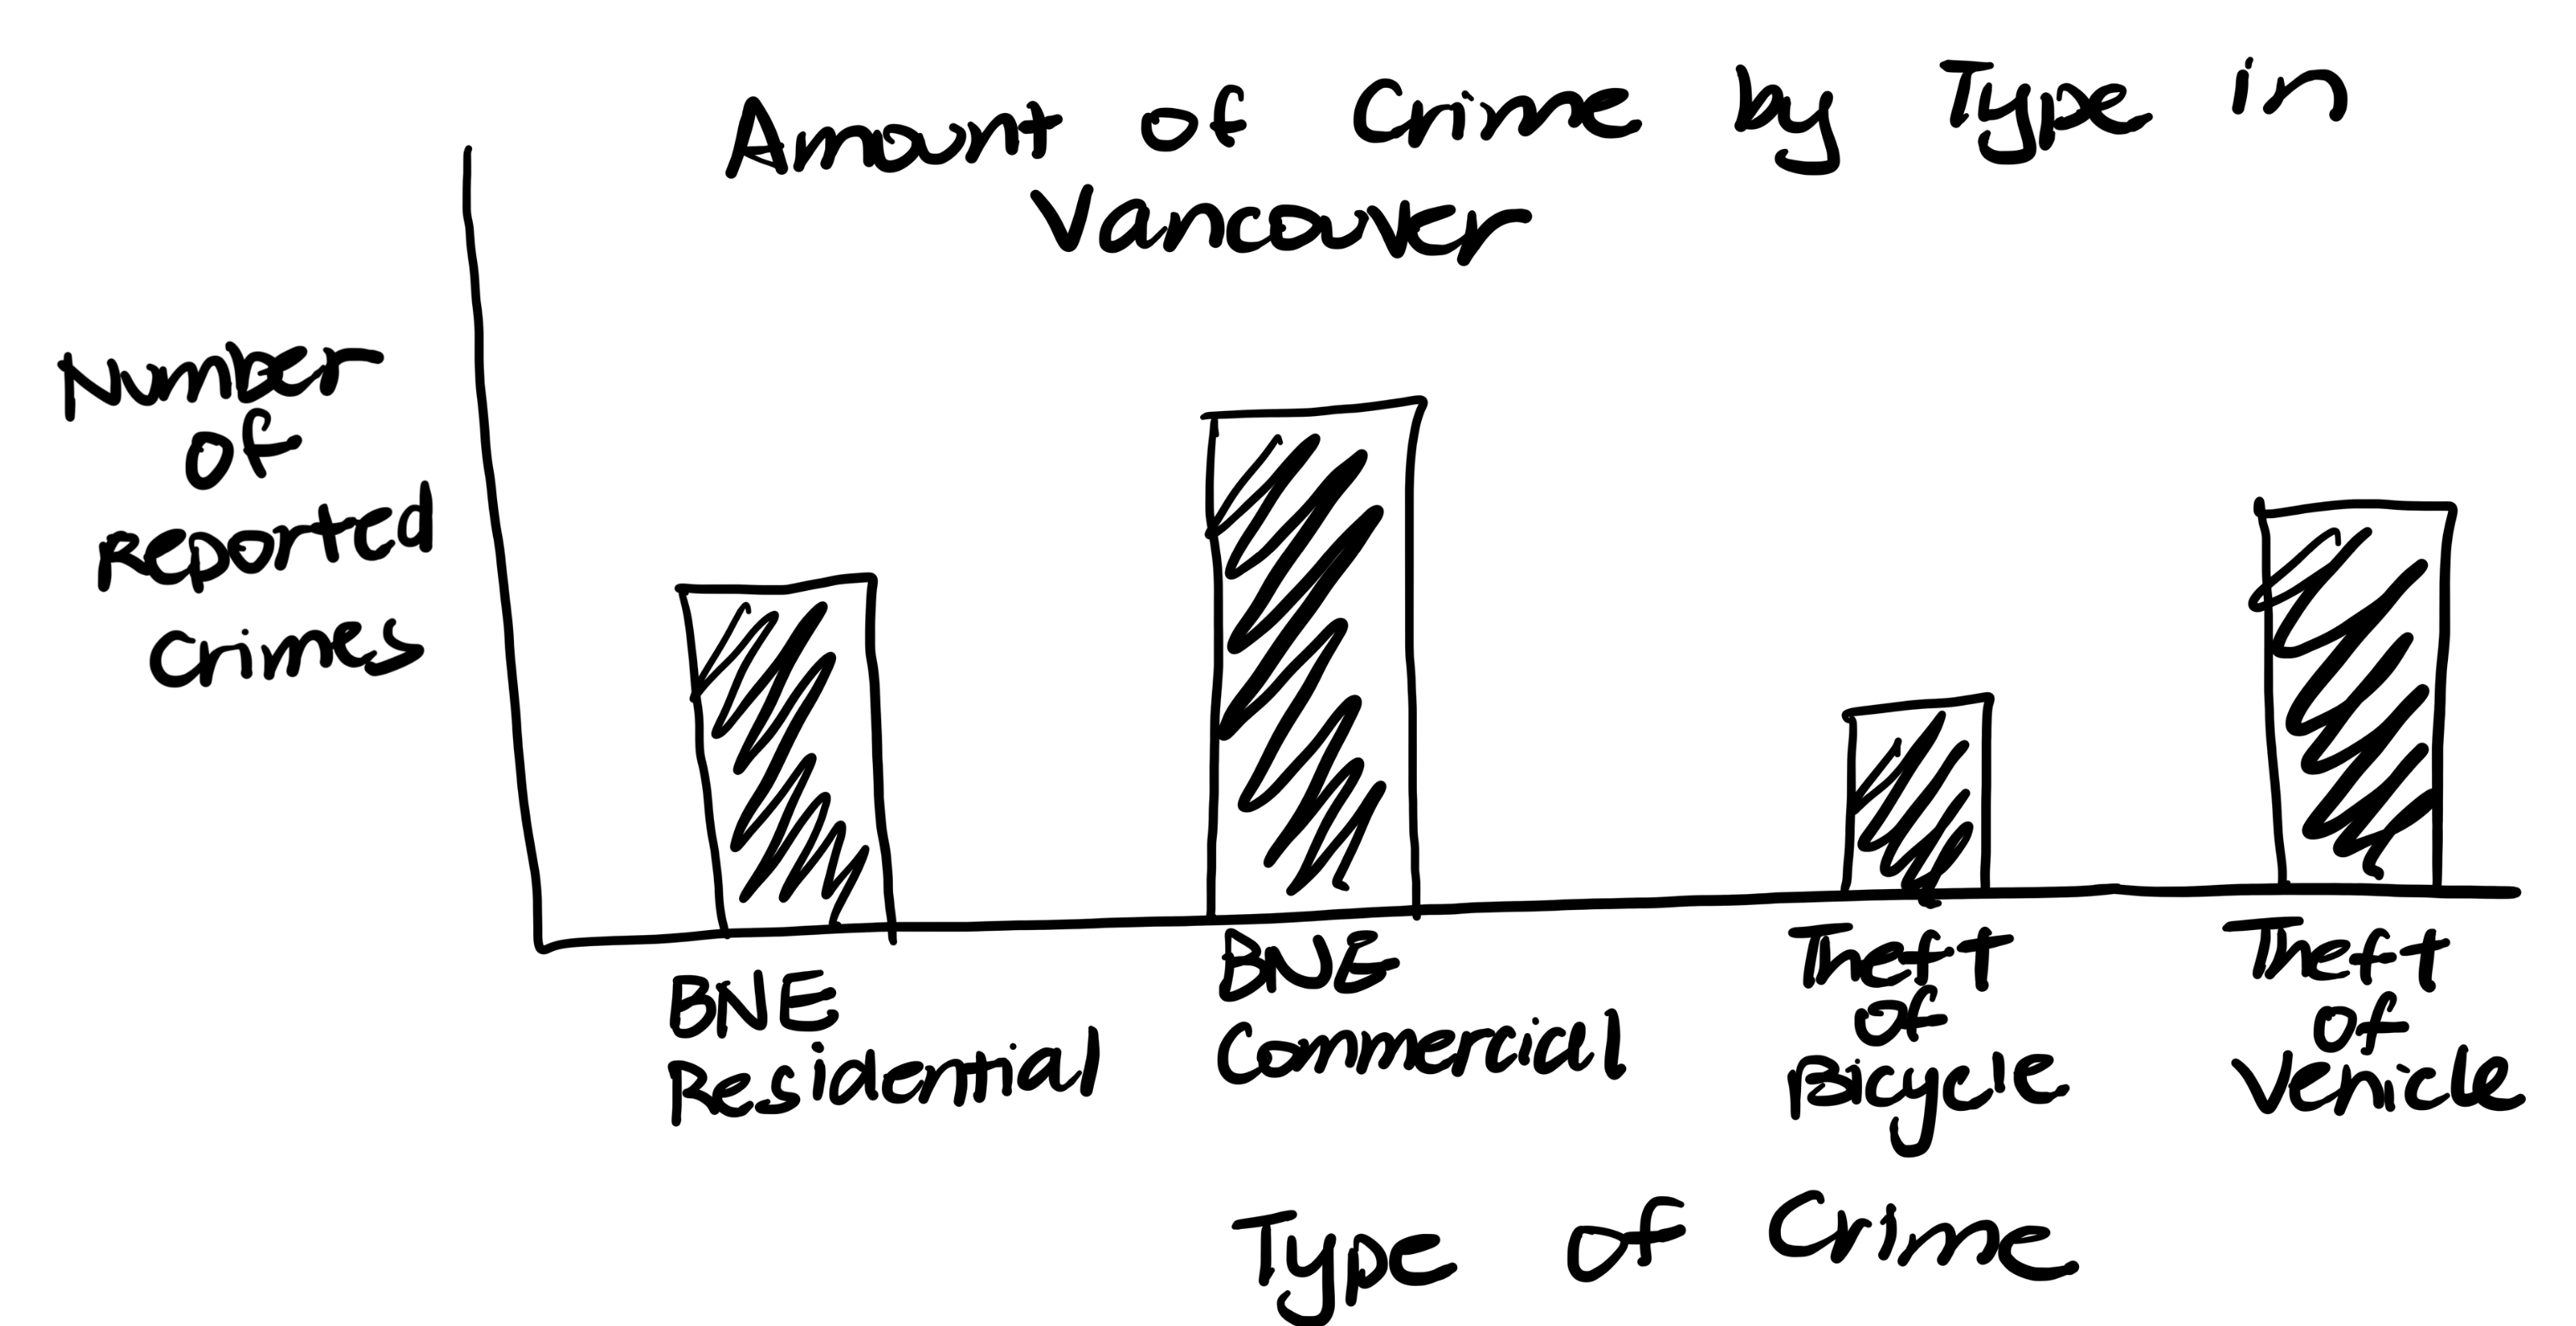

In [13]:
# Helper function
@typecheck
def count_crimes_for_labels(labels: List[str], locd: List[CrimeData]) -> List[int]:
    """
    Determines the total number of crimes in locd that are of the type specificed by each value within labels.

    If labels is an empty list, returns an empty list.

    If locd is empty (but labels is not), the function will return a list filled with 0's. 
    The number of items in that list will match the number of items in labels.
    (Another way to think about this is: "There are no items in locd that match a given value inside labels".)
    """
    return [] # stub

    # TODO: Try to implement this function!
    # The desired behaviour is shown below with the tests
    
    # HINT: Can you reuse some previous helper functions?
    

start_testing()

# Test 1: What happens when labels are empty (i.e., we don't really want to plot any bars)
expect(count_crimes_for_labels([], [CrimeData(CrimeType.BNE_RESIDENTIAL, 6), 
                                    CrimeData(CrimeType.BNE_RESIDENTIAL, 6),
                                    CrimeData(CrimeType.BNE_RESIDENTIAL, 6),
                                    CrimeData(CrimeType.THEFT_OF_BICYCLE, 23),
                                    CrimeData(CrimeType.THEFT_OF_VEHICLE, 12),
                                    CrimeData(CrimeType.THEFT_OF_VEHICLE, 18)]), [])

# Test 2: What happens when both labels and locd are empty?
expect(count_crimes_for_labels([], []), [])

# Test 3: What happens when labels is not empty but locd is?
# There should be a result because based on locd, there are 0 crimes with the type of whatever is inside
# labels
expect(count_crimes_for_labels(["Break and Enter Commercial"], []), [0])

# Test 4: What happens when the value in labels refers to something that doesn't exist in crime data?
# (This is similar to test 3 but we want to make sure that this case works when locd actually
# has data inside)
expect(count_crimes_for_labels(["Break and Enter Commercial"], [CrimeData(CrimeType.BNE_RESIDENTIAL, 6), 
                                                                CrimeData(CrimeType.BNE_RESIDENTIAL, 6),
                                                                CrimeData(CrimeType.BNE_RESIDENTIAL, 6),
                                                                CrimeData(CrimeType.THEFT_OF_BICYCLE, 23),
                                                                CrimeData(CrimeType.THEFT_OF_VEHICLE, 12),
                                                                CrimeData(CrimeType.THEFT_OF_VEHICLE, 18)]), [0])

# Test 5: What happens when some values in labels match and some don't?
expect(count_crimes_for_labels(["Break and Enter Commercial", "Break and Enter Residential/Other", "Theft of Vehicle"], 
                               [CrimeData(CrimeType.BNE_RESIDENTIAL, 6),
                                CrimeData(CrimeType.BNE_RESIDENTIAL, 6),
                                CrimeData(CrimeType.BNE_RESIDENTIAL, 6),
                                CrimeData(CrimeType.THEFT_OF_BICYCLE, 23),
                                CrimeData(CrimeType.THEFT_OF_VEHICLE, 12),
                                CrimeData(CrimeType.THEFT_OF_VEHICLE, 18)]), [0, 3, 2])

summary()


---------------------------------------------------------------------------
TypecheckError

while checking the returned value: None is a NoneType, not a List

  File "/tmp/ipykernel_84/625462615.py", line 24, in <module>
    expect(count_crimes_for_labels([], [CrimeData(CrimeType.BNE_RESIDENTIAL, 6),
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

as expected in

  @typecheck
  def count_crimes_for_labels(labels: List[str], locd: List[CrimeData]) -> List[int]:
      """
      Determines the total number of crimes in locd that are of the type specificed by each value within labels.
  
      If labels is an empty list, returns an empty list.
  
      If locd is empty (but labels is not), the function will return a list filled with 0's. 
      The number of items in that list will match the number of items in labels.
      (Another way to think about this is: "There are no items in locd that match a given value inside labels".)
      """
      #return []

Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_84/625462615.py", line 24, in <module>
    expect(count_crimes_for_labels([], [CrimeData(CrimeType.BNE_RESIDENTIAL, 6),
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.11/site-packages/cs103/typecheck/typecheck.py", line 137, in wrapper
    subtype("the returned value", retval, types['return'], fn, True)
  File "/opt/conda/lib/python3.11/site-packages/cs103/typecheck/typecheck.py", line 91, in subtype
    raise error_type(va,name,astr(tb), fn,value_description)
cs103.typecheck.typecheck.TypecheckError: while checking the returned value: None is a NoneType, not a List

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-

<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Sample solution (For later.  Don't peek if you want to learn 🙂)</summary>
   
```python
@typecheck
def count_crimes_for_labels(labels: List[str], locd: List[CrimeData]) -> List[int]:
    """
    Determines the total number of crimes in locd that are of the type specificed by each value within labels.

    If labels is an empty list, returns an empty list.

    If locd is empty (but labels is not), the function will return a list filled with 0's. 
    The number of items in that list will match the number of items in labels.
    (Another way to think about this is: "There are no items in locd that match a given value inside labels".)
    """
    # return [] # stub

    # the number of crimes for each crime type seen so far
    means = [] # type: List[int]

    for l in labels:
        crime_type = parse_crime_type(l) # Hey! Function reuse!

        # Be careful of using a built in function like len in your project! 
        # You will not be allowed to use built in functions unless your TA gives explicit written permission.
        filtered_locd = filter_for_crime_type(locd, crime_type)
        means.append(len(filtered_locd))

    return means

start_testing()

# Test 1: What happens when labels are empty (i.e., we don't really want to plot any bars)
expect(count_crimes_for_labels([], [CrimeData(CrimeType.BNE_RESIDENTIAL, 6), 
                                    CrimeData(CrimeType.BNE_RESIDENTIAL, 6),
                                    CrimeData(CrimeType.BNE_RESIDENTIAL, 6),
                                    CrimeData(CrimeType.THEFT_OF_BICYCLE, 23),
                                    CrimeData(CrimeType.THEFT_OF_VEHICLE, 12),
                                    CrimeData(CrimeType.THEFT_OF_VEHICLE, 18)]), [])

# Test 2: What happens when both labels and locd are empty?
expect(count_crimes_for_labels([], []), [])

# Test 3: What happens when labels is not empty but locd is?
# There should be a result because based on locd, there are 0 crimes with the type of whatever is inside
# labels
expect(count_crimes_for_labels(["Break and Enter Commercial"], []), [0])

# Test 4: What happens when the value in labels refers to something that doesn't exist in crime data?
# (This is similar to test 3 but we want to make sure that this case works when locd actually
# has data inside)
expect(count_crimes_for_labels(["Break and Enter Commercial"], [CrimeData(CrimeType.BNE_RESIDENTIAL, 6), 
                                                                CrimeData(CrimeType.BNE_RESIDENTIAL, 6),
                                                                CrimeData(CrimeType.BNE_RESIDENTIAL, 6),
                                                                CrimeData(CrimeType.THEFT_OF_BICYCLE, 23),
                                                                CrimeData(CrimeType.THEFT_OF_VEHICLE, 12),
                                                                CrimeData(CrimeType.THEFT_OF_VEHICLE, 18)]), [0])

# Test 5: What happens when some values in labels match and some don't?
expect(count_crimes_for_labels(["Break and Enter Commercial", "Break and Enter Residential/Other", "Theft of Vehicle"], 
                               [CrimeData(CrimeType.BNE_RESIDENTIAL, 6),
                                CrimeData(CrimeType.BNE_RESIDENTIAL, 6),
                                CrimeData(CrimeType.BNE_RESIDENTIAL, 6),
                                CrimeData(CrimeType.THEFT_OF_BICYCLE, 23),
                                CrimeData(CrimeType.THEFT_OF_VEHICLE, 12),
                                CrimeData(CrimeType.THEFT_OF_VEHICLE, 18)]), [0, 3, 2])

summary()
```
</details>

<div class="alert alert-success">
    
**Food for Thought:** How would the design of <code>count_crimes_for_labels</code> change if we *always* wanted to have four bars in the graph?

</div>

In [20]:
@typecheck
def main(filename: str, bar_names: List[str]) -> None:
    """
    Reads the file from given filename, analyzes the data,
    returns the result
    
    bar_names indicate what bars we want to produce in our graph.
    The values inside this list can only be one or more of: "Break and Enter Commercial",
    "break and Enter Residential/Other", "Theft of Bicycle", or "Theft of Vehicle".
    """
    # Template from HtDAP, based on composition
    return analyze(read(filename))

@typecheck
# You will often want to rename this function!
def analyze(locd: List[CrimeData]) -> None:
    """
    Creates a bar graph depicting the amount of crime per value inside bar_names.
    """
    #return None #stub


# It may be easier to read your tests
# if you wrap each set in start_testing/summary.

start_testing()

#Tests for main
#Test 1: test_empty file with an empty list for bar_names

# We have an x-axis label called "Type of Crime", y-axis label called "Number of Reported Crimes",
# and our graph title is "Amount of Crime by Type in Vancouver"
# There should be an empty graph (no bars) and no bar label in the x-axis


expect(main("test_empty.csv",[]),None )

#Test 2: test_empty file with some non-empty bar_names list
# We have an x-axis label called "Type of Crime", y-axis label called "Number of Reported Crimes",
# and our graph title is "Amount of Crime by Type in Vancouver"
# There should be an empty graph (no bars) with a "Theft of Bicycle" label in the x-axis
expect(main("test_empty.csv", ["Theft of Bicycle"]), None)

#Test 3: test_small1 (or test_small2) with some non-empty bar_names list
    #3a: the test file doesn't contain data of the types specified in bar_name
    # We have an x-axis label called "Type of Crime", y-axis label called "Number of Reported Crimes",
    # and our graph title is "Amount of Crime by Type in Vancouver"
    # There should be an empty graph (no bars) with a "Theft of Bicycle" label in the x-axis
    
expect(main("test_small1.csv", ["Theft of Bicycle"]), None)
    
    
    #3b: the test file has data of the types specified in bar_names
    # We have an x-axis label called "Type of Crime", y-axis label called "Number of Reported Crimes",
    # and our graph title is "Amount of Crime by Type in Vancouver"
    # There should be two bars in the graph. One for Theft of Bicycle at height 1 and the other for
    # Break and Enter Residential/Other at height 3

expect(main("test_small2.csv", ["Theft of Bicycle", "Break and Enter Residential/Other"]), None)
    




# Examples and tests for analyze
expect(..., ...) 

summary()

6 of 6 tests passed


<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Sample solution (For later.  Don't peek if you want to learn 🙂)</summary>
   
```python
@typecheck
def main(filename: str, crime_type_names: List[str]) -> None:
    """
    Reads the file from given filename, analyzes the data,
    returns the result.

    crime_type_names is the list of crime types we wish to create a bar for.
    ASSUMES: The values inside crime_type_names are either "Break and Enter Commercial",
    "Break and Enter Residential/Other", "Theft of Bicycle", "Theft of Vehicle".
    """
    # Template from HtDAP, based on composition
    return display_bar_chart(crime_type_names, read(filename))

@typecheck
def display_bar_chart(labels: List[str], means: List[CrimeData]) -> None:
    """
    display a bar chart showing the mean scores for the test by age group
    
    the age groups are assumed to start at 0 and span 10 years (e.g. 0-9, 10-19, etc.)
    """
    # return None # stub

    # template based on visualization
    crime_counts = count_crimes_for_labels(labels, means)
    
    rects1 = pyplot.bar(labels, crime_counts)

    # set the labels for the x-axis, y-axis, and plot title
    pyplot.xlabel('Type of Crime')
    pyplot.ylabel('Number of Reported Crimes')
    pyplot.title('Amount of Crime by Type in Vancouver')
    
    # set the range for the axes
    # [x-min, x-max, y-min, y-max]
    # pyplot.axis([0,79,0,100]) # not much realize to set axes labels so we will continue to have this commented out.

    # The labels for each bar are quite long and overlap each other
    # Let's turn them 90 degrees so that we can easily read it
    pyplot.xticks(rotation=90)
    
    # show the plot
    pyplot.show()
    
    # by default, Python returns None if it gets to the end of a function and there is no call to return
    # so we could have omitted the next line of code. It also returns None when there is a return 
    # statement that does not explicitly return a value (like we have here)
    return

################################
# Tests for main
################################
start_testing()

# Test 1: There is no data at all and we aren't actually looking to plot anything
# We expect to see a plot with the x-axis label "Type of Crime", a y-axis label of 
# "Number of Reported Cases", and a plot title of "Amount of Crime by Type in Vancouver".
expect(main("test_empty.csv", []), None)

# Test 2: There is no data but we did want to plot something -- it just so happened that there was
# no data.
# We expect to see a plot with the x-axis label "Type of Crime", a y-axis label of 
# "Number of Reported Cases", and a plot title of "Amount of Crime by Type in Vancouver".
# There should be a single mark in the axis labeled "Theft of Bicycle" with no bar.
expect(main("test_empty.csv", ["Theft of Bicycle"]), None)

# Test 3: There is data but not the type we want
# We expect to see a plot with the x-axis label "Type of Crime", a y-axis label of 
# "Number of Reported Cases", and a plot title of "Amount of Crime by Type in Vancouver".
# There should be a single mark in the axis labeled "Theft of Bicycle" with no bar.
expect(main("test_small1.csv", ["Theft of Bicycle"]), None)

# Test 4: There is data where some of it is what we are looking for and others not.
# We expect to see a plot with the x-axis label "Type of Crime", a y-axis label of 
# "Number of Reported Cases", and a plot title of "Amount of Crime by Type in Vancouver".
# There should be two bars in the graph. One bar is labeled "Theft of Bicycle" and should
# have a height of 1. The other bar should be labeled with "Break and Enter Residential/Other"
# and have a height of 3.
expect(main("test_small2.csv", ["Theft of Bicycle", "Break and Enter Residential/Other"]), None)

summary()

################################
# Tests for display_bar_chart
################################
start_testing()

# Test 1: There is no data at all and we aren't actually looking to plot anything
# We expect to see a plot with the x-axis label "Type of Crime", a y-axis label of 
# "Number of Reported Cases", and a plot title of "Amount of Crime by Type in Vancouver".
expect(display_bar_chart([], []), None)

# Test 2: There is no data but we did want to plot something -- it just so happened that there was
# no data.
# We expect to see a plot with the x-axis label "Type of Crime", a y-axis label of 
# "Number of Reported Cases", and a plot title of "Amount of Crime by Type in Vancouver".
# There should be a single mark in the axis labeled "Theft of Bicycle" with no bar.
expect(display_bar_chart(["Theft of Bicycle"], []), None)

# Test 3: There is data but not the type we want
# We expect to see a plot with the x-axis label "Type of Crime", a y-axis label of 
# "Number of Reported Cases", and a plot title of "Amount of Crime by Type in Vancouver".
# There should be a single mark in the axis labeled "Theft of Bicycle" with no bar.
expect(display_bar_chart(["Theft of Bicycle"], [CrimeData(CrimeType.BNE_COMMERCIAL, 6)]), None)

# Test 4: There is data where some of it is what we are looking for and others not.
# We expect to see a plot with the x-axis label "Type of Crime", a y-axis label of 
# "Number of Reported Cases", and a plot title of "Amount of Crime by Type in Vancouver".
# There should be two bars in the graph. One bar is labeled "Theft of Bicycle" and should
# have a height of 2. The other bar should be labeled with "Break and Enter Residential/Other"
# and have a height of 3.
expect(display_bar_chart(["Theft of Bicycle", "Break and Enter Residential/Other"], 
                         [CrimeData(CrimeType.THEFT_OF_BICYCLE, 2),
                          CrimeData(CrimeType.THEFT_OF_BICYCLE, 0),
                          CrimeData(CrimeType.BNE_RESIDENTIAL, 16),
                          CrimeData(CrimeType.BNE_RESIDENTIAL, 16),
                          CrimeData(CrimeType.BNE_RESIDENTIAL, 18),
                          CrimeData(CrimeType.THEFT_OF_VEHICLE, 4)]), None)


summary()
```
</details>

In [10]:
# Use this to determine what arguments are REQUIRED and
# what other customization options are possible
help(pyplot.bar)

Help on function bar in module matplotlib.pyplot:

bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
    Make a bar plot.
    
    The bars are positioned at *x* with the given *align*\ment. Their
    dimensions are given by *height* and *width*. The vertical baseline
    is *bottom* (default 0).
    
    Many parameters can take either a single value applying to all bars
    or a sequence of values, one for each bar.
    
    Parameters
    ----------
    x : float or array-like
        The x coordinates of the bars. See also *align* for the
        alignment of the bars to the coordinates.
    
    height : float or array-like
        The height(s) of the bars.
    
    width : float or array-like, default: 0.8
        The width(s) of the bars.
    
    bottom : float or array-like, default: 0
        The y coordinate(s) of the bottom side(s) of the bars.
    
    align : {'center', 'edge'}, default: 'center'
        Alignment of the bars to the *x* coord

In [11]:
main("crimedata_subset_bne_theft_of_bike_veh_2018.csv", ["Break and Enter Commercial",
                                                         "Break and Enter Residential/Other",
                                                         "Theft of Bicycle",
                                                         "Theft of Vehicle"])

---
# After the course...

* You will have access to Syzygy as long as you are a registered UBC student.
* After the term ends, access Syzygy by going to (https://ubc.syzygy.ca/). 
* If you want to download a copy of your files, see [here](https://docs.google.com/document/d/180jP5st75NDXFpQW5jkfUrji4uZVaBPtTBobNpmOJv8/edit?usp=sharing) for instructions.

## Interested in More Python?
* [Python] CPSC 203 (you learn about data structures other than lists and solve some really interesting problems!)
* [Teaching Languages - Subset of Racket] CPSC 107 (important if you want to apply for a CS major!)
* [Racket] CPSC 110 (CPSC 103/107 are equivalent to CPSC 110). CPSC 110 is required for all CS majors

## Interested in Computer Science?
* Consider majoring in CS! (There are lots of combined major/honours programs like MICB/CS, Business/CS, Physics/CS, etc.)
* About to graduate? Consider the BCS program. Some of our TAs are in the BCS program so feel free to ask them for their thoughts on the program!
---

# Thanks for joining us this term!